## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)





In [5]:
#Data types Mouse Data
mouse_metadata.dtypes

Mouse ID        object
Drug Regimen    object
Sex             object
Age_months       int64
Weight (g)       int64
dtype: object

In [6]:
#Index Mouse Data
print(mouse_metadata.columns)

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')


In [7]:
#Dtata types Study results 
study_results.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [8]:
print(study_results.columns)

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


In [9]:
#Read Data Mouse file and store into Data Frame
mouse_metadata=pd.read_csv(mouse_metadata_path)
mouse_metadata.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [10]:
#Read Data Study results and stoere into Data Frame
study_results=pd.read_csv(study_results_path)
study_results.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


##Data Consideration> Identified as common index Mouse ID and is an object

In [11]:
# Combine the data into a single dataset within a single DataFrame 
#mouse_metadata
#study_results
#Common index> Mouse ID
comboraw_df=pd.merge(mouse_metadata,study_results, on="Mouse ID",how= "inner")
#whats the difference with outer, apply outer and result is the same*****************************************

# Display the data table for preview
comboraw_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice and identify incomplete rows. Uncleaned Data Base
comboraw_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

##Data Consideration> It shows 1893 rows × 8 columns, as well as 1893 values within each column, ******take out

In [13]:
# Checking the number of mice and identify incomplete rows (2ways to perform)
##micenumber=len(comboraw_df.groupby("Mouse ID")["Mouse ID"].unique())
##print(f"The Number of mice identified is {micenumber}")

micenumber=len(comboraw_df["Mouse ID"]. value_counts())
print(f"The Number of mice identified is {micenumber}")

The Number of mice identified is 249


In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#How subset perform???*********************************************************check on duplicates on the 2 columns
micedouble= comboraw_df.loc[comboraw_df.duplicated(subset=
                            ["Mouse ID","Timepoint",]),"Mouse ID"].unique()
print(f"The duplicated mice ID is {micedouble}")

The duplicated mice ID is ['g989']


In [15]:
# Optional: Get all the data for the duplicate mouse ID.
#How can I put it starting from zero - descendant? not starting 908********* NOT NECESSARY  MICE ARE SINCE 908
miceg989_df=comboraw_df[comboraw_df["Mouse ID"]=="g989"]
miceg989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
comboclean_df=comboraw_df.loc[comboraw_df["Mouse ID"] != "g989"]
comboclean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Checking the number of mice in the clean DataFrame.
mice989count=len(comboclean_df["Mouse ID"]. value_counts())
print(f"The Number non duplicated mice 989 identified is {mice989count}")

The Number non duplicated mice 989 identified is 248


In [18]:
# Checking the number of mice in the clean DataFrame.
comboclean_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

##Data Consideration> It shows 1880 rows × 8 columns, so Data cleaning has been accomplished

## Summary Statistics

In [19]:
#OK
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.


#should I convert value to number/how??? should I use count, when count or unique?

count=comboclean_df. groupby("Drug Regimen")["Mouse ID"].nunique()
##print(count)
mean=comboclean_df. groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
##print(mean)
median=comboclean_df. groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
##print(median)
variance=comboclean_df. groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
##print(variance)
stdev=comboclean_df. groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
##print(stdev)
sem=comboclean_df. groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
##print(sem)

# This method 1 is the most straighforward, creating multiple series and putting them all together at the end.

print("Summary Statistics Table:Tumor Volume by Drug Regimen")
summarycomboclean1_df=pd.DataFrame({
                                "Mice Count": count,
                                "Mean": mean,
                                "Median": median,
                                "Variance": variance, 
                                "Standard Deviation":stdev,
                                "SEM": sem})
summarycomboclean1_df 


#Can I generate the tables with column totals????*******************


Summary Statistics Table:Tumor Volume by Drug Regimen


,Mice Count,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,25,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,25,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,25,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,25,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,25,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,25,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,24,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,25,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,24,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
#Reset index as for bringing the table format
#****GET  DRUG REGIMEN AS COLUMN AND INDEX 0,1,2***********************
summarycomboclean1_df.reset_index(inplace=True)
summarycomboclean1_df

,Drug Regimen,Mice Count,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,25,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,25,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,25,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,25,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,25,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,25,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,24,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,25,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,24,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,25,53.236507,51.818479,48.533355,6.966589,0.516398


In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#IT WORKS!!and short syntaxis but not the same table tiles as above***********
##summarycomboclean2_df= comboclean_df.groupby("Drug Regimen").agg(
                                #{"Mouse ID": ["nunique"],
                                 #"Tumor Volume (mm3)":
                                #["mean","median","var","std","sem"]})                        


# This method 2 produces everything in a single groupby function
##summarycomboclean2_df

#summarycomboclean2_df.reset_index(inplace=True)
#summarycomboclean2_df


Mouse ID Tumor Volume (mm3)                                  \
              nunique               mean     median        var       std   
Drug Regimen                                                               
Capomulin          25          40.675741  41.557809  24.947764  4.994774   
Ceftamin           25          52.591172  51.776157  39.290177  6.268188   
Infubinol          25          52.884795  51.820584  43.128684  6.567243   
Ketapril           25          55.235638  53.698743  68.553577  8.279709   
Naftisol           25          54.331565  52.509285  66.173479  8.134708   
Placebo            25          54.033581  52.288934  61.168083  7.821003   
Propriva           24          52.320930  50.446266  43.852013  6.622085   
Ramicane           25          40.216745  40.673236  23.486704  4.846308   
Stelasyn           24          54.233149  52.431737  59.450562  7.710419   
Zoniferol          25          53.236507  51.818479  48.533355  6.966589   

                        
                   sem  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

In [18]:
#OK
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summarycomboclean2_df= comboclean_df.groupby("Drug Regimen").agg(
                            Mice_Count = ("Mouse ID", "nunique"),
                            Mean = ("Tumor Volume (mm3)", "mean"),
                            Median = ("Tumor Volume (mm3)", "median"),
                            Variance = ("Tumor Volume (mm3)", "var"),
                            Standard_Deviation = ("Tumor Volume (mm3)", "std"),
                            SEM = ("Tumor Volume (mm3)", "sem")
                            )

# This method 2 produces everything in a single groupby function
summarycomboclean2_df

,Mice_Count,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,,
Capomulin,25,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,25,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,25,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,25,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,25,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,25,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,24,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,25,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,24,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
#Reset index as for bringing the table format
#****GET  DRUG REGIMEN AS COLUMN AND INDEX 0,1,2***********************
summarycomboclean2_df.reset_index(inplace=True)
summarycomboclean2_df


,Drug Regimen,Mice_Count,Mean,Median,Variance,Standard_Deviation,SEM
0,Capomulin,25,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,25,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,25,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,25,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,25,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,25,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,24,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,25,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,24,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,25,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

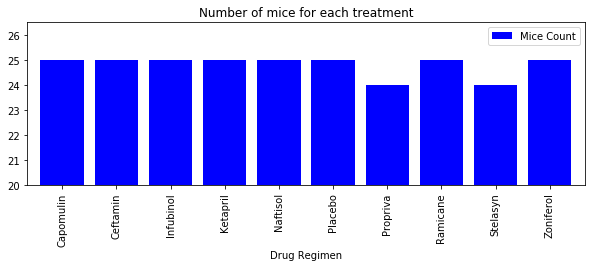

In [20]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#Using pandas we can generate graphs from DataFrame and groupby 
#Using groupby DataFrame created on summary 1
summarycomboclean1_df.plot.bar(x="Drug Regimen", y="Mice Count",
                                    ylim=(20,26.5), 
                                    figsize=(10,3),
                                    width= 0.8,
                                    title="Number of mice for each treatment",
                                    facecolor="blue")


plt.show()

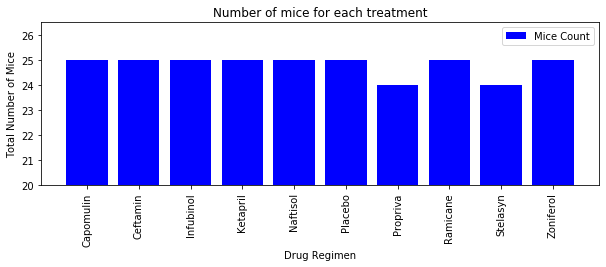

In [21]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#Using pyplot we can generate graphs from axis and tick locations
#Using DataFrame created on summary 2

xaxis =summarycomboclean2_df["Drug Regimen"]
yaxis = summarycomboclean2_df ["Mice_Count"]

plt.figure(figsize=(10,3))
plt.bar(xaxis, yaxis, 
        align= "center", 
        label="Mice Count", 
        alpha=1,
        color="blue")
plt.xticks(rotation=90)
plt.ylim(20,26.5)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.title("Number of mice for each treatment")
plt.legend()


plt.show()

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


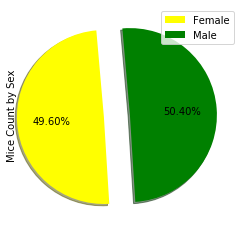

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender1=comboclean_df.groupby("Sex")["Mouse ID"].nunique()
print(gender1)

gender1.plot(kind="pie", autopct="%1.2f%%", explode=[0.3,0], colors=["yellow","green"], startangle=95, legend=True, labels=None,shadow=True)
plt.ylabel("Mice Count by Sex")
plt.show()

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


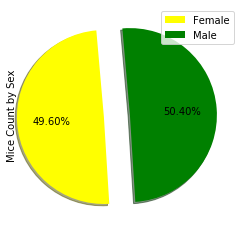

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender2=comboclean_df.groupby("Sex")["Mouse ID"].nunique()
print(gender2)

labels=gender2.index
plt.pie(gender2, autopct="%1.2f%%", explode=[0.3,0], colors=["yellow","green"], startangle=95, labels=None ,shadow=True)
plt.legend(labels)
plt.ylabel("Mice Count by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
lastmousetimepoint = comboclean_df.groupby(["Mouse ID", "Drug Regimen"]).agg(Timepoint=("Timepoint","max"))


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
lastmousetimepoint_df = lastmousetimepoint.merge(comboclean_df, how="inner", on = ["Mouse ID", "Drug Regimen","Timepoint"])
lastmousetimepoint_df


,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a262,Placebo,45,Female,17,29,70.717621,4
3,a275,Ceftamin,45,Female,20,28,62.999356,3
4,a366,Stelasyn,30,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,10,Female,12,26,48.710661,0
244,z578,Ramicane,45,Male,11,16,30.638696,0
245,z581,Infubinol,45,Female,24,25,62.754451,3
246,z795,Naftisol,45,Female,13,29,65.741070,3


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatmentlist=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvoldata = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatmentlist:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorvolume = lastmousetimepoint_df["Tumor Volume (mm3)"].loc[lastmousetimepoint_df["Drug Regimen"] == regimen]
    #print(tumorvolume)
    
    # add subset 
    tumorvoldata.append(tumorvolume)
    #print(tumorvoldata)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorvolume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    print(f"Treatment: {regimen}")
    print(f"The lower quartile Tumor Volume (mm3), for {regimen} is:{round(lowerq,3)}")
    print(f"The upper quartile Tumor Volume (mm3), for {regimen} is:{round(upperq,3)}")
    print(f"The median Tumor Volume (mm3), for {regimen} is:{round(quartiles[0.5],3)}")
    print(f"The interquartile range is: {round(iqr,3)}")
    
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr)
    
    print(f"For {regimen} values below {round(lowerbound,3)} could be lower outliers.")
    print(f"For {regimen} values above {round(upperbound,3)} could be upper outliers.\n")
    
    loweroutliers= lastmousetimepoint_df["Drug Regimen"][lastmousetimepoint_df["Tumor Volume (mm3)"] < lowerbound].count()
    upperoutliers= lastmousetimepoint_df["Drug Regimen"][lastmousetimepoint_df["Tumor Volume (mm3)"] > upperbound].count()                                                                     
    outliers= loweroutliers + upperoutliers
    print(f"{outliers} posible outliers were found for {regimen}.\n")
    

Treatment: Capomulin
The lower quartile Tumor Volume (mm3), for Capomulin is:32.377
The upper quartile Tumor Volume (mm3), for Capomulin is:40.159
The median Tumor Volume (mm3), for Capomulin is:38.125
The interquartile range is: 7.782
For Capomulin values below 20.705 could be lower outliers.
For Capomulin values above 51.832 could be upper outliers.

146 posible outliers were found for Capomulin.

Treatment: Ramicane
The lower quartile Tumor Volume (mm3), for Ramicane is:31.56
The upper quartile Tumor Volume (mm3), for Ramicane is:40.659
The median Tumor Volume (mm3), for Ramicane is:36.562
The interquartile range is: 9.099
For Ramicane values below 17.913 could be lower outliers.
For Ramicane values above 54.307 could be upper outliers.

132 posible outliers were found for Ramicane.

Treatment: Infubinol
The lower quartile Tumor Volume (mm3), for Infubinol is:54.049
The upper quartile Tumor Volume (mm3), for Infubinol is:65.526
The median Tumor Volume (mm3), for Infubinol is:60.165


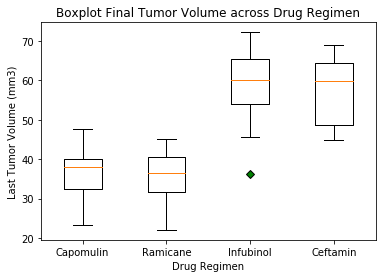

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond= dict(markerfacecolor="green", marker="D")
fig, ax = plt.subplots()
ax.set_title("Boxplot Final Tumor Volume across Drug Regimen")
ax.set_ylabel("Last Tumor Volume (mm3)")
ax.boxplot(tumorvoldata, flierprops=green_diamond)
ax.set_xticklabels(treatmentlist)
ax.set_xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

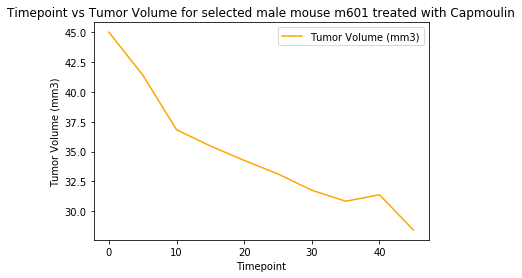

In [51]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
lineplot = comboclean_df.loc[(comboclean_df["Mouse ID"] == "m601")]
lineplot.plot(x = "Timepoint",y ="Tumor Volume (mm3)", color = "orange")
plt.title("Timepoint vs Tumor Volume for selected male mouse m601 treated with Capmoulin")
plt.ylabel("Tumor Volume (mm3)")

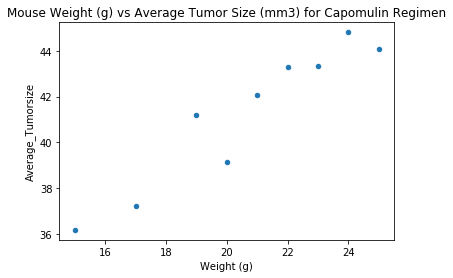

In [58]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatterplot = comboclean_df.loc[(comboclean_df["Drug Regimen"] == "Capomulin")]
scatterplot = scatterplot.groupby("Weight (g)").agg(Average_Tumorsize = ("Tumor Volume (mm3)", "mean")). reset_index()
scatterplot.plot(kind = "scatter", x = "Weight (g)", y = "Average_Tumorsize", title = "Mouse Weight (g) vs Average Tumor Size (mm3) for Capomulin Regimen")

## Correlation and Regression

The correlation factor for Weight and Average_Tumorsize is 0.95


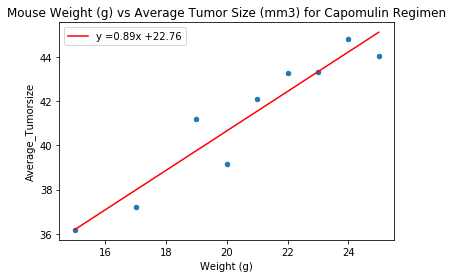

In [72]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Correlation factor
Weight = scatterplot["Weight (g)"]
Average_Tumorsize = scatterplot["Average_Tumorsize"]
correlation = st.pearsonr(Weight,Average_Tumorsize)
print(f"The correlation factor for Weight and Average_Tumorsize is {round(correlation[0],2)}")

#Line equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Weight, Average_Tumorsize) 
regress_values = Weight * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str (round(intercept,2))
scatterplot.plot(kind = "scatter", x = "Weight (g)", y = "Average_Tumorsize", title = "Mouse Weight (g) vs Average Tumor Size (mm3) for Capomulin Regimen")
plt.plot(Weight, regress_values, "r-", label=line_eq)
plt.legend()
plt.show()
